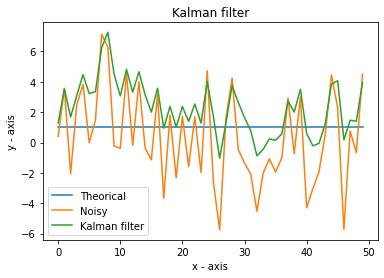

In [39]:
import numpy as np
import matplotlib.pyplot as plt

##########################################
##          Kalman filter               ##
##########################################
SAMPLE = 50
# Sampling freq
x = [x for x in range(SAMPLE)]
# Initial state
mu = 0
sig = 10
# Constant motion
# motion = [1,1,2,1,1]
motion = [1]*SAMPLE
motion_sig = 2
# Mesurements
# mesure = [5, 6, 7, 9, 10]
mesure = [val+np.random.normal(0,3) for val in motion]
mesure_sig = 4
filtered = []

def measurement_update(prior_mean, prior_var, measure_mean, measure_var):
  new_mean = ((measure_var * prior_mean 
              + prior_var * measure_mean) 
             / (prior_var + measure_var))
  new_var = 1/ ((1/prior_var)+(1/measure_var));
  # print([new_mean,new_var])
  return [new_mean,new_var]

def state_prediction(mean1, var1, mean2, var2):
  new_mean = mean1 + mean2
  new_var = var1 + var2
  # print([new_mean,new_var])
  return [new_mean,new_var]

for i in range(SAMPLE):
  [mu, sig] = measurement_update(mu, sig, mesure[i], mesure_sig)
  [mu, sig] = state_prediction(mu, sig, motion[i], motion_sig)
  filtered.append(mu)

# print(filtered)
###########################################
# plotting the points
plt.plot(x, motion, label = "Theorical")
plt.plot(x, mesure, label = "Noisy")
plt.plot(x, filtered, label = "Kalman filter")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Kalman filter')
plt.legend() 
plt.show()
###########################################
